<a href="https://colab.research.google.com/github/2303A52164/Generative_ai_2025/blob/main/Generative_AI_2303A52164_Week_No_8_Assignment_8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative AI - Assignment - 8.3**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/winequality-red (1).csv')

In [5]:
# Split data into features and labels
X = df.drop(columns=['quality'])
y = df['quality']

In [6]:
# Convert quality into binary classification (good/bad wine)
y = (y >= 6).astype(int)

In [7]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Build ANN model
model = keras.Sequential([
    keras.layers.Dense(16, activation='sigmoid', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(24, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Train model
history = model.fit(X_train, y_train, epochs=260, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5309 - loss: 0.6926 - val_accuracy: 0.5594 - val_loss: 0.6855
Epoch 2/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5190 - loss: 0.6913 - val_accuracy: 0.5594 - val_loss: 0.6838
Epoch 3/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5362 - loss: 0.6861 - val_accuracy: 0.5594 - val_loss: 0.6819
Epoch 4/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5524 - loss: 0.6825 - val_accuracy: 0.5625 - val_loss: 0.6805
Epoch 5/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5341 - loss: 0.6819 - val_accuracy: 0.5594 - val_loss: 0.6755
Epoch 6/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5397 - loss: 0.6761 - val_accuracy: 0.5688 - val_loss: 0.6711
Epoch 7/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5756 - loss: 0.6728 - val_accuracy: 0.6187 - val_loss: 0.6657
Epoch 8/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6145 - loss: 0.6695 - val_accuracy: 0.6156 - 

In [12]:
# Save trained model
model.save("wine_quality_model.h5")

In [13]:
# Load model for deployment
loaded_model = keras.models.load_model("wine_quality_model.h5")

In [14]:
# Evaluate model
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.5045  
Test Accuracy: 0.7469


In [15]:
# Predictions
y_pred = (loaded_model.predict(X_test) > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


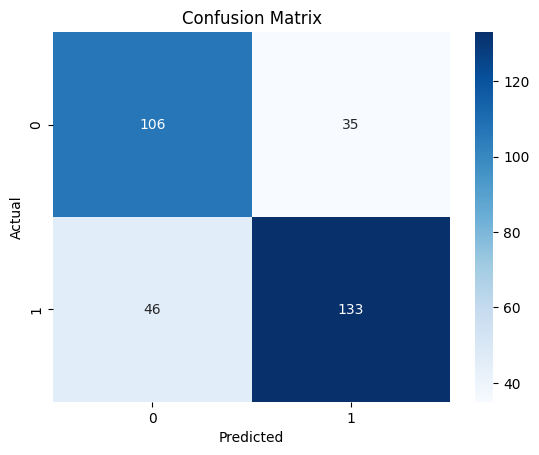

In [16]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       141
           1       0.79      0.74      0.77       179

    accuracy                           0.75       320
   macro avg       0.74      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

